Random code, ignore this

In [1]:
import numpy as np
import pandas as pd

In [2]:
from fxvol.strategy import get_pred, run_strategy

In [3]:
from fxvol.data_utils import load_csv, save_csv, make_xy

In [4]:
log_rets = load_csv("processed", "log_returns").dropna()
CURRENCIES = ["AUD", "CHF", "EUR", "GBP", "JPY"]

In [62]:
HORIZON = 5
FEATURE_KWARGS = {"lags": [1, 5, 22, 66], "vol_vol": 22}

In [63]:
data = [(curr,) + make_xy(log_ret=log_rets[curr], horizon=HORIZON, **FEATURE_KWARGS) for curr in CURRENCIES]

In [71]:
from fxvol.baseline_models import naive_fc
from fxvol.ML_models import ols_fc

In [72]:
pf_ret = run_strategy(data=data,
                      model = (ols_fc, "ols", {}),
                      horizon=HORIZON,
                      target_vol=0.1,
)

<Axes: xlabel='Date'>

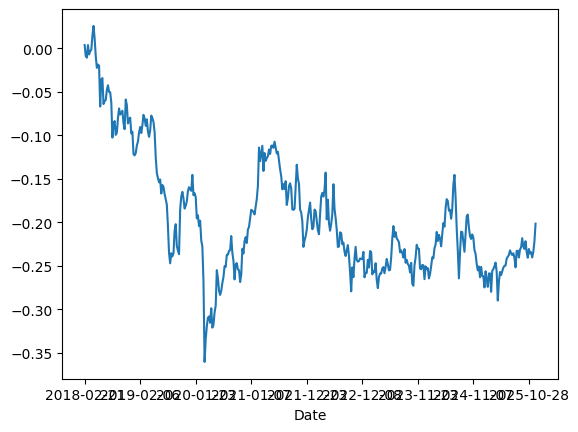

In [73]:
pf_ret.plot()

In [74]:
sig = pf_ret.std()
mu = pf_ret.mean()

In [75]:
sig, mu

(0.07114585744062595, -0.19381554518657726)

In [76]:
mu/sig

-2.7242000048748314

In [ ]:
sig/np.sqrt(252)

In [ ]:
log_rets = load_csv("processed", "log_returns").dropna()
log_ret = log_rets["JPY"]
cs = log_ret.cumsum()

In [ ]:
cs = cs.loc[total_ret.index]
df = pd.DataFrame(index = cs.index, data = {'cs':cs, 'total_ret': total_ret.iloc[:,0]})
df.plot()